<a href="https://colab.research.google.com/github/Akshaya1409/EDA-on-Insurance-dataset/blob/main/EDA_on_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA on Insurance dataset 


 diff between label and oneheart encoding

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_insurance=pd.read_csv("/content/insurance (2).csv")
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Basic Exploratory Analysis to understand the structure of the data

In [ ]:
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df_insurance.shape

(1338, 7)

In [ ]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_insurance.describe().T # 5 point summary   skewness from this---> compare the difference of mean and median("50%")

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Description of data

In [ ]:
df_insurance.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Check and handling the missing values

In [ ]:
df_insurance.isnull().sum() #no missing values but there can be hidden missing values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

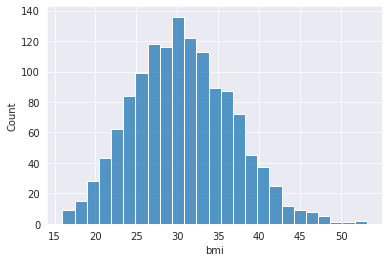

In [ ]:
sns.histplot(x='bmi',data=df_insurance,palette="autumn")

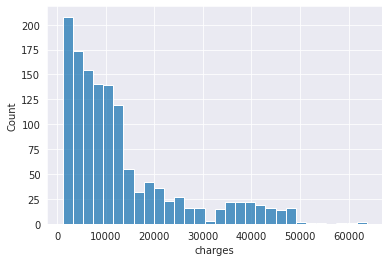

In [ ]:
sns.histplot(x='charges',data=df_insurance,palette="autumn")

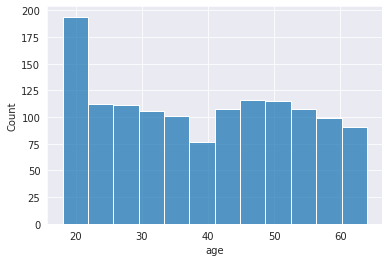

In [ ]:
sns.histplot(x='age',data=df_insurance,palette="autumn")

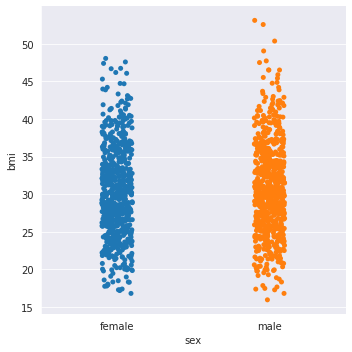

In [ ]:
sns.catplot(x="sex", y="bmi", data=df_insurance); # no significant changes 

Hypothesis testing 

In [ ]:
#null(Ho)= null hypothesis be that there is a significant difference of bmi between male and female 
#alternate hypothesis(Ha)=No significant changes
x=np.array(df_insurance[df_insura])

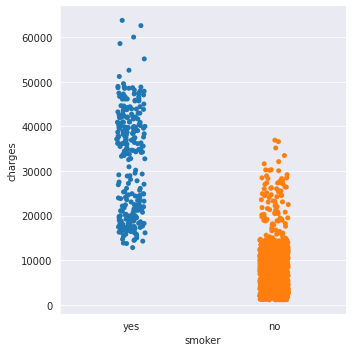

In [ ]:
sns.catplot(x="smoker", y="charges", data=df_insurance)

In [ ]:
df_insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


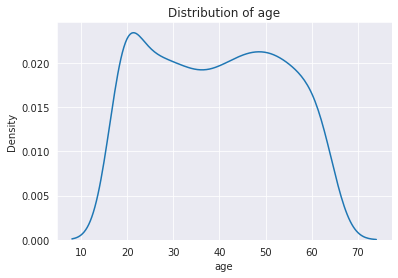

In [ ]:
sns.set_style("darkgrid")
plt.title("Distribution of age")
sns.distplot(df_insurance['age'],hist=False)

Age data is uniformly distributed  

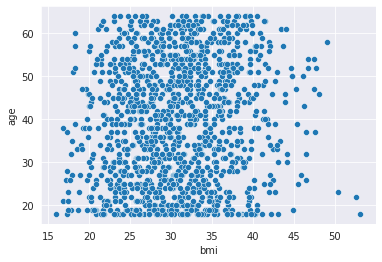

In [ ]:
sns.scatterplot(x="bmi",y="age",data=df_insurance)

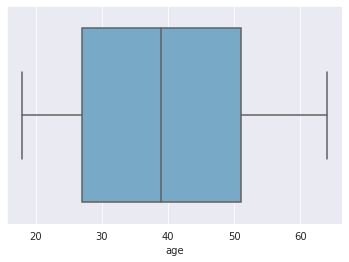

In [ ]:
sns.boxplot(x=df_insurance["age"],palette="Blues")

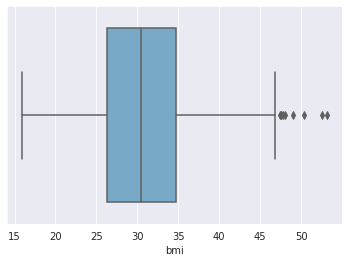

In [ ]:
sns.boxplot(x=df_insurance["bmi"],palette="Blues")

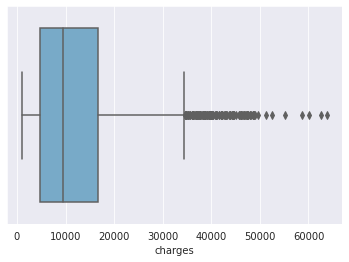

In [ ]:
sns.boxplot(x=df_insurance["charges"],palette="Blues")  # when there are more outliers they are brought into IQR using 3std deviation 

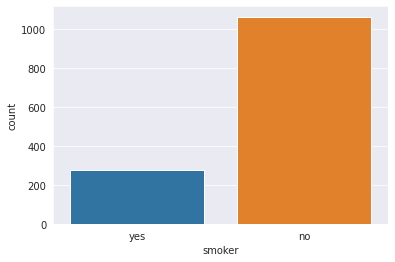

In [ ]:
sns.countplot(x="smoker",data=df_insurance)

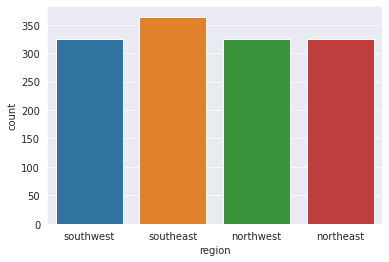

In [ ]:
sns.countplot(x="region",data=df_insurance)

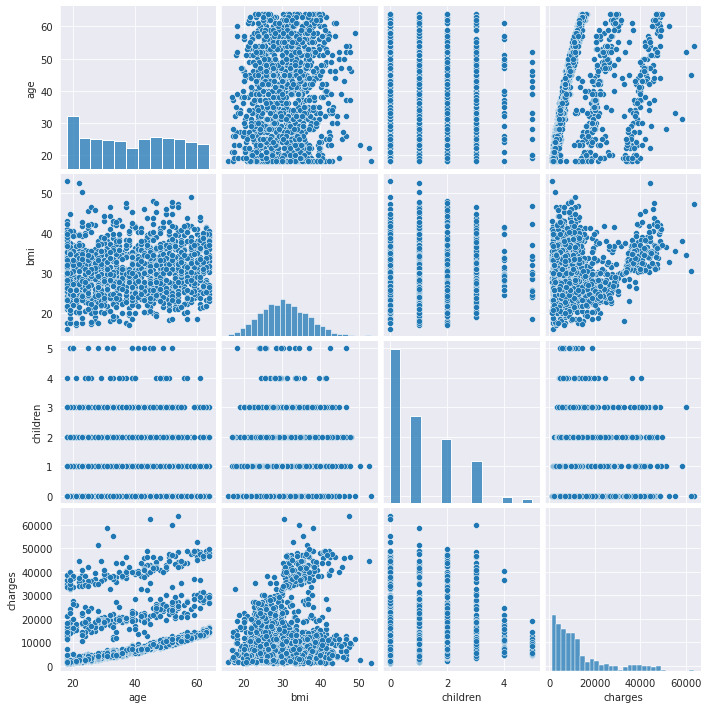

In [ ]:
sns.pairplot(df_insurance)

gender and charges

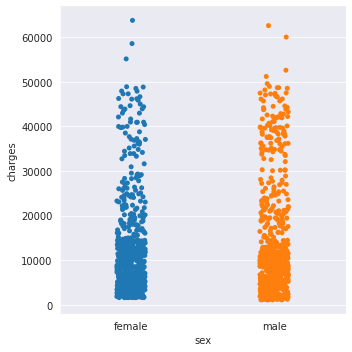

In [ ]:
sns.catplot(x="sex", y="charges", data=df_insurance);

In [ ]:
from scipy import stats
#null(Ho)=  bmi between male and female do not differ 
#alternate hypothesis(Ha)= significant changes
x=np.array(df_insurance[df_insurance.sex=="female"].charges)
y=np.array(df_insurance[df_insurance.sex=="male"].charges)


In [ ]:
t,p=stats.ttest_ind(x,y,axis=0)
print(t,p)

-2.097546590051688 0.03613272100592976


In [ ]:
if p<0.05:
    print("Null hypothesis rejected")
else:
    print("we fail to accept null hypothesis")

Null hypothesis rejected


Gender and smoker

In [ ]:
cross_tab=pd.crosstab(df_insurance.sex, df_insurance.smoker)
cross_tab

smoker,no,yes
sex,,
female,547,115
male,517,159


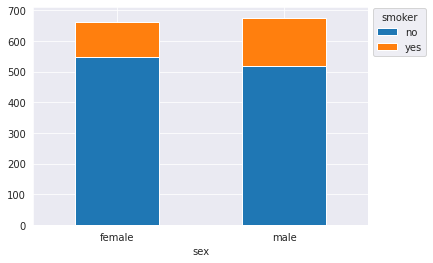

In [ ]:
ax = cross_tab.plot(kind='bar', stacked=True,rot=0)
ax.legend(title='smoker', bbox_to_anchor=(1, 1.02), loc='upper left')

chi square test

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
freq=np.array([[547,115],[517,159]])

statistic,p,dof,expctd=chi2_contingency(freq)
statistic,p

(7.39291081459996, 0.006548143503580696)

In [ ]:
if p<0.05:
    print("Null hypothesis rejected")
else:
    print("we fail to accept null hypothesis")

Null hypothesis rejected


region and smoking habits

In [ ]:
ct=pd.crosstab(df_insurance.region, df_insurance.smoker)
ct

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


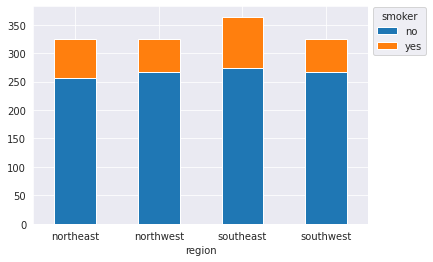

In [ ]:
ax = ct.plot(kind='bar', stacked=True,rot=0)
ax.legend(title='smoker', bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
#Ho(null hypothesis)=Region does not affect smoking habit
#Ha=region do affect the smoking habit
freq=np.array([[257,65],[267,58],[273,91],[267,58]])

statistic,p,dof,expctd=chi2_contingency(freq)
statistic,p

(7.372582132307241, 0.060924349299642945)

In [ ]:
if p<0.05:
    print("Null hypothesis rejected")
else:
    print("we fail to accept null hypothesis") # thus region has no effect on smoking habit

we fail to accept null hypothesis


In [ ]:
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
bmi of women with 1 children,2 children 

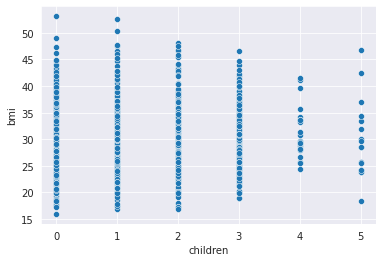

In [ ]:
sns.
sns.scatterplot(x="children",y="bmi",data=df_insurance)

In [ ]:
from scipy.stats import f_oneway

In [ ]:
child0=np.array(df_insurance[df_insurance.children==0].bmi)
child1=np.array(df_insurance[df_insurance.children==1].bmi)
child2=np.array(df_insurance[df_insurance.children==3].bmi)

f_oneway(child0,child1,child2)

F_onewayResult(statistic=0.03654977589864012, pvalue=0.9641113274780752)

In [ ]:
if p<0.05:
    print("Null hypothesis rejected")
else:
    print("we fail to accept null hypothesis")

Null hypothesis rejected
